# Projekt zaliczeniowy - Metody Statystyczne II

## Opis projektu:

Celem projektu jest przeprowadzenie analizy statystycznej wybranych zbiorów danych przy pomocy poznanych metod. Przez metodę rozumiany jest zbiór narzędzi statystycznych omawianych w ramach pojedynczego wykładu. 

W poniższym projekcie zostały wybrane trzy metody z czego ostatnia - testy nieparametryczne zostały zobrazowane na zbiorach danych sztucznie generowanych.

## Podejście autora projektu:

W swoim projekcie zaliczeniowym zdecydowałem się zwrócić w kierunku kilku podejść i przeprowadzić analizy na więcej niż jednym zbiorze danych. W ten sposób chciałem poznać bardziej praktyczny charakter wykładanych metody podczas wykładów.

Dodatkowo jedno zagadnienie jest zobrazowane i przedstawione przez autora w spsoób bardziej teoretyczny ( czysty kod ) tak aby zobaczyć przykładową implementacje w Pythnie.

Większość kodu będzie tłumaczona na bieżąco bądź pokazywany będzie zamysł autora za pomocą kodu.

Funkcje oraz obiekty będą nazywane przez autora w języku angielskim aby w późniejszych stadiach móc pokazać to na GitHubie w celu zwiększenia zasięgów. 


## Dodatkowy komentarz

W rozdziale drugim zdecydowałem się wykroczyć poza omawiany na zajęciach materiał i pokazac inne metody regresji, tak aby mieć spojrzenie przekrojowe na pewien zbiór metod.

Każdy z rozdziałów posiada krótkie podsumowanie,

### Autor projektu:

Mikołaj Maślanka

emial1: mikolaj.mslanka@gmail.com

email2: mm108279@student.sgh.waw.pl

telefon: +48 732 753 112

# Spis Treści


# 1. Metody resamplingpwe
### 1.1. Bootstrapping
### 1.2. Jackknife Resampling
### 1.3. Permutation Test
### 1.4. Podsumowanie części dotyczącej Reasamplingu


# 2. Regresja nieparametryczna
### 2.1. Regresja grzbietu jądra
### 2.2. Regresja drzewa decyzyjnego
### 2.3. Regresja najbliższego sąsiada
### 2.4. Regresja wektorów wsparcia
### 2.5. Stochastyczna regresja gradientu


# 3. Nieparametryczne testy istotności statystycznej
### 3.1. Zbiór danych
### 3.2. Mann-Whitney U Test
### 3.3. Wilcoxon Signed-Rank Test
### 3.4. Kruskal-Wallis H Test
### 3.5. Friedman Test
### 3.6. Podsumowanie

# Metody resamplingowe

W idealnym świecie próbki są losowo wybranymi i reprezentatywnymi podzbiorami populacji. Praca z próbkami faktycznie ma wiele zalet, takich jak praktyczność, opłacalność, oszczędność czasu i łatwość zarządzania.

Błąd próbkowania to różnica między parametrem populacji a statystyką obliczoną na podstawie próbki (taką jak różnica między średnią populacji a średnią próbki). Ponieważ próbki są podzbiorami populacji, nie obejmują wszystkich członków populacji. 

Dlatego statystyki obliczane na podstawie próbek (takie jak średnia, mediana, odchylenie standardowe, kwantyle itp.) zasadniczo różnią się od rzeczywistych parametrów populacji.

Biorąc pod uwagę, że próbki są określone jako reprezentujące całą populację, różnica między statystykami próbki i populacji jest uważana za błąd.

Aby pokonać błąd próbkowania, możemy zastosować następujące metody resamplingu.

1. Bootstrapping
2. Jackknife Resampling
3. Test permutacji

## Bootstrapping

Bootstrapping to metoda tworzenia próbek z zastąpieniem oryginalnej próbki. Każdy punkt danych ma równe prawdopodobieństwo późniejszego pobrania. Możemy bootstrapować n razy (powiedzmy 1000), obliczyć i zapisać pożądane oszacowanie (tj. średnią) dla każdej z tych n próbek. Na koniec możemy znaleźć rozkład dla pożądanego oszacowania.

Ogólne przypadki użycia bootstrappingu to znalezienie solidnych szacunków przedziałów ufności, błędów standardowych parametrów populacji, takich jak średnia, mediana, współczynnik korelacji, współczynnik regresji itp.


Aby zilustrować Bootstrapping w Pythonie, użyję zestawu danych Fish market z Kaggle. Zestaw danych składa się z 7 popularnych gatunków ryb w sprzedaży na rynku a ja skupię się na rybie Płoć.

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline
plt.style.use("fivethirtyeight")

In [27]:
df = pd.read_csv(r'C:\Users\mikol\Desktop\Python_Met_II/Fish.csv')
data = df.copy()
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [28]:
data["Species"].value_counts(normalize=True)
data = data.loc[data["Species"] == "Roach"]["Length1"]
pd.DataFrame({'values': data.describe()}).reset_index()

,index,values
0,count,20.000000
1,mean,20.645000
2,std,3.459917
3,min,12.900000
4,25%,18.900000
5,50%,20.500000
6,75%,22.025000
7,max,29.500000


In [22]:
print(f'Mean: {data.mean():.2f}')
conf_i = np.percentile(data, [2.5, 97.5])
print(f'Confidence intervals: {conf_i}')

Mean: 20.65
Confidence intervals: [14.61   27.3625]


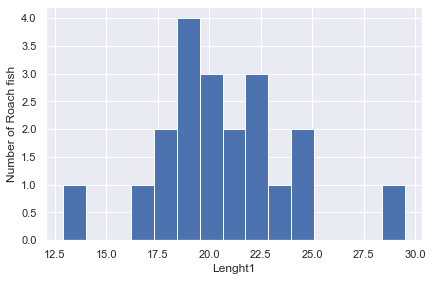

In [23]:
sns.set()
plt.hist(data, bins=15)
plt.xlabel("Lenght1")
plt.ylabel("Number of Roach fish")
plt.savefig("hist1.png")
plt.show()

Możemy obliczyć średnią próbki za pomocą data.mean(), 95% przedziały ufności za pomocą np.percentyl(data, [2,5,97,5]).

Jednak przechodząc od rozkładu próby do rozkładu populacji, dokonujemy kilku ukrytych założeń, takich jak: rozkład wartości „Długość1” ma rozkład normalny, a przedziały ufności są symetryczne. W większości przypadków te założenia mogą nie być poprawne.

Z tego powodu powinniśmy wykonać bootstrap, aby znaleźć średnią i przedziały ufności.

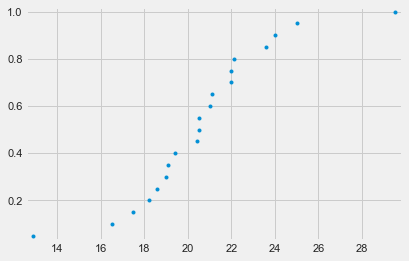

In [29]:
x = np.sort(data)
n = len(data)
y = np.arange(1, n+1)/n
plt.plot(x,y, marker=".", linestyle="none")
plt.margins(0.02)
plt.show()

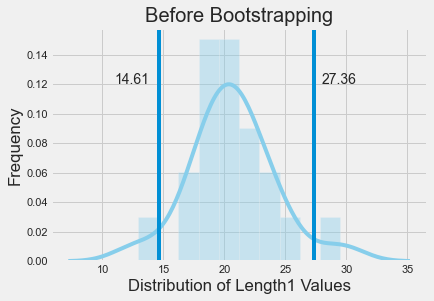

In [30]:
ax = sns.distplot(data,bins=10,kde=True,color='skyblue')
ax.axvline(conf_i[0])
ax.axvline(conf_i[1])
ax.text(11,0.12, conf_i[0])
ax.text(28,0.12, round(conf_i[1],2))
ax.set(xlabel='Distribution of Length1 Values', ylabel='Frequency')
ax.set_title("Before Bootstrapping", fontsize=20)
plt.savefig("fish_ci_before.png")
plt.show();

In [31]:
mean_lengths, n = [], 1000
for i in range(n):
    sample = np.random.choice(data,
                              replace=True,
                              size=len(data))
    sample_mean = sample.mean()
    mean_lengths.append(sample_mean)

# Calculate bootstrapped mean and 95% confidence interval.
boot_mean = np.mean(mean_lengths)
boot_ci = np.percentile(mean_lengths, [2.5, 97.5])
print("Bootstrapped Mean Length = {}, 95% CI = {}".format(boot_mean, boot_ci))

Bootstrapped Mean Length = 20.64109, 95% CI = [19.22475  22.160125]


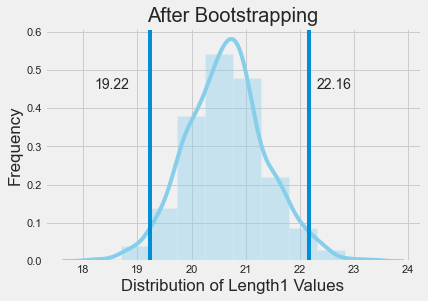

In [32]:
ax = sns.distplot(mean_lengths,bins=10,kde=True,color='skyblue')
ax.axvline(boot_ci[0])
ax.axvline(boot_ci[1])
ax.text(18.2,0.45, round(boot_ci[0], 2))
ax.text(22.3,0.45, round(boot_ci[1], 2))
ax.set_title("After Bootstrapping", fontsize=20)
ax.set(xlabel='Distribution of Length1 Values', ylabel='Frequency')
plt.savefig("fish_ci_after.png")
plt.show();

import warnings
warnings.filterwarnings('ignore')

In [33]:
data = df.copy()
data = data.loc[data["Species"] == "Roach"][["Length1", "Weight"]]
data.sample(2)

data.corr()

data_size, lw_corr = data.shape[0], []
for i in range(1000):
    tmp_df = data.sample(n=data_size, replace=True)
    lw_corr.append(tmp_df["Weight"].corr(tmp_df["Length1"]))

corr_ci = np.percentile(lw_corr, [2.5, 97.5])
print("Correlation 95% Confidence Interval between Weight and Length1 = {}".format(corr_ci))

Correlation 95% Confidence Interval between Weight and Length1 = [0.77068031 0.97751127]


Średnia Bootstrapped = 20,60, 

95% przedział ufności = [19,22 22,07]


# Jackknife Resampling

Technika resamplingu Jackknife polega na tworzeniu próbek poprzez systematyczne pomijanie jednej obserwacji w oryginalnym zbiorze danych. Powinniśmy obliczyć żądaną wartość dla każdej próbki, a następnie znaleźć rozkład wszystkich wartości.

Ogólne przypadki ponownego próbkowania Jackknife to znajdowanie wariancj.

In [34]:
data = df.copy()
data = data.loc[data["Species"] == "Roach"]["Length1"]

In [35]:
mean_lengths, n = [], len(data)
index = np.arange(n)

for i in range(n):
    jk_sample = data[index != i]
    mean_lengths.append(jk_sample.mean())

mean_lengths_jk = np.mean(np.array(mean_lengths))
jk_variance = (n-1)*np.var(mean_lengths)
print("Jackknife estimate of the mean = {}".format(mean_lengths_jk))
print("Jackknife estimate of the variance = {}".format(jk_variance))

Jackknife estimate of the mean = 20.645
Jackknife estimate of the variance = 0.5985513157894758


# Permutation Test

Test permutacji to rodzaj testu istotności statystycznej, który próbuje uzyskać rozkład statystyki testowej (przy hipotezie zerowej) bez robienia silnych założeń dotyczących danych.

Test permutacji działa w następujący sposób:

1. Łączymy dwie próbki w jeden zestaw danych.

2. Połączony zestaw danych i losowo ponownie próbkujemy go na 2 zestawy danych (o takiej samej wielkości jak poprzednie próbki).

3. Obliczamy statystyki testu (tj. różnicę między średnimi).

4. Powtórzamy powyższe kroki n razy (powiedzmy 10000 razy).

5. Porówujemy oryginalną statystykę testową z wartościami zarejestrowanymi, jeśli oryginalna statystyka testowa dobrze pasuje do zapisów permutowanych, to statystyki testowe rzeczywiście nie różnią się, a różnica między średnimi z próby jest wyłącznie przypadkowa. Jeśli oryginalna statystyka nie mieści się w najbardziej permutowanych rekordach, oznacza to, że istnieje znacząca różnica między dwiema próbkami.

Aby zilustrować test permutacji w Pythonie, ponownie użyję zestawu danych rynku rybnego z Kaggle wybierając atrybuty “Length1” i “Length2”.

Będę badał, czy średnie wartości tych dwóch wartości różnią się znacznie.

In [36]:
data = df.copy()
data = data.loc[data["Species"] == "Roach"][["Length1", "Length2"]]
data.head()

,Length1,Length2
35,12.9,14.1
36,16.5,18.2
37,17.5,18.8
38,18.2,19.8
39,18.6,20.0


In [37]:
print(f'Mean of Length1: {data["Length1"].mean():.2f}')
print(f'Mean of Length2: {data["Length2"].mean():.2f}')

Mean of Length1: 20.65
Mean of Length2: 22.27


Badamy, czy różnica między dwiema średnimi próbkami jest przypadkowa, czy statystycznie istotna.

In [38]:
sample1 = data["Length1"]
sample2 = data["Length2"]

In [39]:
data = np.concatenate([sample1, sample2])

perm = np.array([np.random.permutation(len(sample1) + len(sample2)) for i in range(10000)])
permuted_1_db = data[perm[:, :len(sample1)]]
permuted_2_db = data[perm[:, len(sample1):]]

samples = np.mean(permuted_1_db, axis=1) - np.mean(permuted_2_db, axis=1)

test_stat = np.mean(sample1) - np.mean(sample2)
p_val = 2*np.sum(samples >= np.abs(test_stat))/10000
print("test_statistic = {}".format(test_stat))
print("p-value = {}".format(p_val))

test_statistic = -1.6299999999999955
p-value = 0.1706


Wartość p mówi nam, że w 15% przypadków powinniśmy oczekiwać, że osiągniemy podobną średnią różnicę między dwiema próbkami.

## Podsumowanie części dotyczącej Reasamplingu

Omówiliśmy trzy metody ponownego próbkowania, aby wyeliminować problem błędu próbkowania w naszych analizach. W ten sposób możemy nie tylko wyodrębnić dokładniejsze oszacowania dotyczące parametru populacji, ale także określić ilościowo niepewność naszych szacunków, np. dodając przedziały ufności. Wykorzystując moc obliczeniową, jaką mamy dzisiaj, możemy ponownie próbkować nasze początkowe próbki tyle razy, ile chcemy, w kilku linijkach kodu.

# Regresja nieparametryczna

Algorytmy nieparametryczne uczenia maszynowego nie opierają się na założeniach dotyczących kształtu danych bazowych. Techniki nieparametryczne obejmują miedzy innymi drzewa decyzyjne.

Podejście nieparametryczne eliminuje całą klasę problemów z danymi a tym samym dodaje dużo elastyczności do uczenia maszynowego. Nie jest to jednak pozbawione wad. Algorytmy nieparametryczne zwykle nie działają tak dobrze, jak modele parametryczne w obliczu niewielkich ilości danych; w przypadku wystarczająco małych danych regresja jest jedyną sensowną opcją. 

Jest to główny powód, dla którego regresja i podobne narzędzia były podstawą statystyki w „erze małych danych”. Podobnie algorytmy nieparametryczne są również bardziej intensywne obliczeniowo i mają mniej stabilne numerycznie rozwiązania. 

Z kolei wykonanie tej samej pracy z regresją logistyczną jest niewiarygodnie "tanie" — „tylko” trzeba odwrócić macierz cech i pomnożyć ją.

Niemniej jednak, przy wystarczająco dużych zestawach danych, wystarczająco skomplikowanych danych i wystarczającym czasie uczenia się, narzędzia nieparametryczne mają tendencję do zastąpienia narzędzi parametrycznych pod względem ogólnej dokładności.

W tym notatniku prezentuję kilka różnych nieparametrycznych technik regresji dostępnych w sklearn. Dla celów demonstracji pokażę aplikację zarówno na syntetycznym zestawie danych dostarczonych w formacie sklearn, jak i rzeczywistym liczba zwycięstw lub remisów rekordów Brazylii w jej meczach Mistrzostw Świata FIFA.

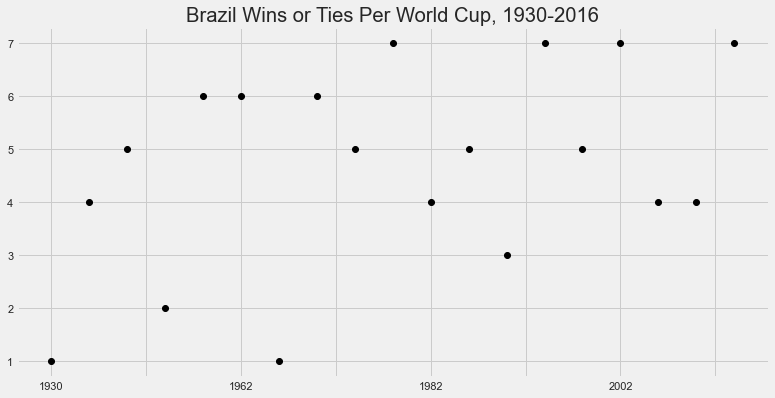

In [44]:
import pandas as pd
df = pd.read_csv(r'C:\Users\mikol\Desktop\Python_Met_II/WorldCupMatches.csv')
df = (df
          .loc[df.apply(lambda srs: ((srs['Home Team Name'] == "Brazil") & (srs['Home Team Goals'] >= srs['Away Team Goals'])) |
                        ((srs['Away Team Name'] == "Brazil") & (srs['Away Team Goals'] >= srs['Home Team Goals'])), axis='columns')]
          .Datetime
          .dropna()
          .map(lambda dt: dt.split("-")[0].strip())
          .map(lambda dt: dt.split(" ")[-1])
          .value_counts()
          .sort_index()
)

import numpy as np
X = np.asarray(list(range(len(df))))[:, np.newaxis]
y = df.values

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
df.plot.line(marker="o", linewidth=0, color='black', title='Brazil Wins or Ties Per World Cup, 1930-2016', figsize=(12, 6))
plt.show()

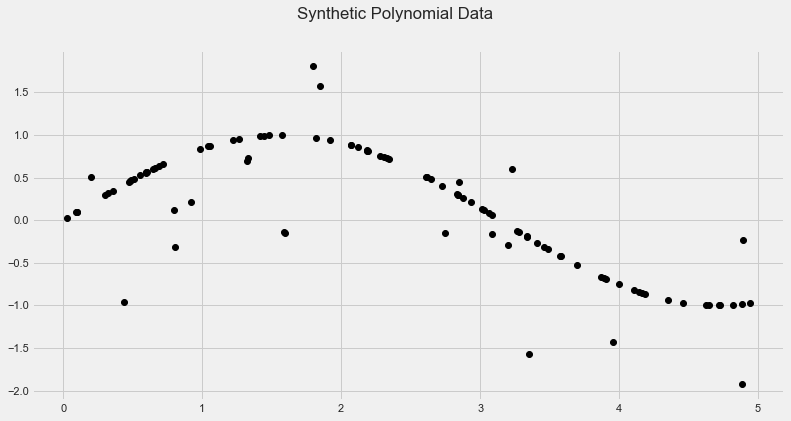

In [45]:
import numpy as np
rng = np.random.RandomState(0)

X_p = 5 * rng.rand(100, 1)
y_p = np.sin(X_p).ravel()

y_p[::5] += 3 * (0.5 - rng.rand(X_p.shape[0] // 5))

fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(X_p[:, 0], y_p, marker='o', color='black', linewidth=0)
plt.suptitle("Synthetic Polynomial Data")
plt.show()

## Regresja grzbietu jądra

Regresja grzbietowa jądra jest rozszerzeniem regresji grzbietowej, która wykorzystuje jądra. 

Innymi słowy, zamiast trenować algorytm regresji grzbietowej na danych w ich pierwotnym ustawieniu liniowym, regresja grzbietowa jądra wymaga przekształcenia tych danych w inną złożoną przestrzeń wektorową, poznania cech w tej przestrzeni, a następnie przekształcenia z powrotem do przestrzeni, którą rozpoczęliśmy w użyciu z jądrem. 

Ponieważ odpowiada to metodzie parametrycznej, regresji grzbietowej, nie jestem pewien, czy ten klasyfikator można ściśle sklasyfikować jako nieparametryczny.

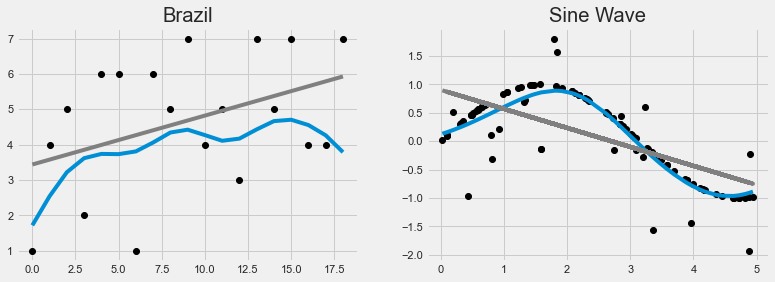

In [46]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge

fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))


clf = KernelRidge(kernel='rbf', gamma=0.1)
clf.fit(X, y)
y_pred = clf.predict(X)
pd.Series(y_pred).plot(ax=axarr[0])
pd.Series(y).plot(ax=axarr[0], marker="o", linewidth=0, color='black')
axarr[0].set_title("Brazil")

clf = Ridge()
clf.fit(X, y)
y_pred = clf.predict(X)
pd.Series(y_pred).plot(ax=axarr[0], color='gray')


axarr[1].plot(X_p[:, 0], y_p, marker='o', color='black', linewidth=0)

clf = KernelRidge(kernel='rbf', gamma=0.8)
clf.fit(X_p, y_p)
y_pred = clf.predict(X_p)
sort = np.argsort(X_p[:, 0])
axarr[1].plot(X_p[:, 0][sort], y_pred[sort], markeredgewidth=0)

clf = Ridge()
clf.fit(X_p, y_p)
y_pred = clf.predict(X_p)
axarr[1].plot(X_p[:, 0], y_pred, color='gray')
axarr[1].set_title("Sine Wave")
pass
plt.show()


Na tych wykresach oryginalny regresor grzbietu jest zaznaczony na szaro, a regresor jądra jest na niebiesko. 

Można wyraźnie zobaczyć, w jaki sposób nieparametryczna natura jądra pozwoliła nam uchwycić wielomianową naturę wprowadzonej fali sinusoidalnej.

## Regresja drzewa decyzyjnego

Drzewa decyzyjne uczą się klasyfikować rzeczy, znajdując informacyjne podziały wzdłuż rekordów w zbiorze danych. 

Można je rozszerzyć do regresji, prosząc drzewo decyzyjne o wypisanie nie klasy, ale liczby zmiennoprzecinkowej. 

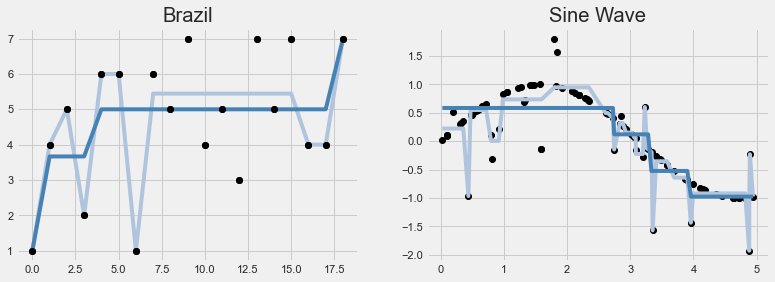

In [47]:
from sklearn.tree import DecisionTreeRegressor

fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))


clf = DecisionTreeRegressor(max_depth=5)
clf.fit(X, y)
y_pred = clf.predict(X)
pd.Series(y_pred).plot(ax=axarr[0], color='lightsteelblue')
pd.Series(y).plot(ax=axarr[0], marker="o", linewidth=0, color='black')

clf = DecisionTreeRegressor(max_depth=2)
clf.fit(X, y)
y_pred = clf.predict(X)
pd.Series(y_pred).plot(ax=axarr[0], color='steelblue')
pd.Series(y).plot(ax=axarr[0], marker="o", linewidth=0, color='black')

axarr[0].set_title("Brazil")

axarr[1].plot(X_p[:, 0], y_p, marker='o', color='black', linewidth=0)

clf = DecisionTreeRegressor(max_depth=5)
clf.fit(X_p, y_p)
y_pred = clf.predict(X_p)
sort = np.argsort(X_p[:, 0])
axarr[1].plot(X_p[:, 0][sort], y_pred[sort], markeredgewidth=0, color='lightsteelblue')

clf = DecisionTreeRegressor(max_depth=2)
clf.fit(X_p, y_p)
y_pred = clf.predict(X_p)
sort = np.argsort(X_p[:, 0])
axarr[1].plot(X_p[:, 0][sort], y_pred[sort], markeredgewidth=0, color='steelblue')
axarr[1].set_title("Sine Wave")
pass
plt.show()

Charakterystyczną cechą regresji drzew decyzyjnych jest stopniowy charakter wyniku regresji. 

Zauważmy, że w obu przypadkach drzewo o głębokości 2 w kolorze ciemnoniebieskim działa znacznie lepiej niż drzewo o głębokości 5 w kolorze jasnoniebieskim, przy czym w obu przypadkach to drugie jest dość mocno przesadzone.

## Regresja najbliższego sąsiada

Regresja najbliższego sąsiedztwa to adaptacja algorytmów najbliższego sąsiedztwa do regresji. 

W algorytmach najbliższego sąsiedztwa każdy punkt w zbiorze danych określa swoją klasę, patrząc na klasy o określonej liczbie najbliższych mu punktów.

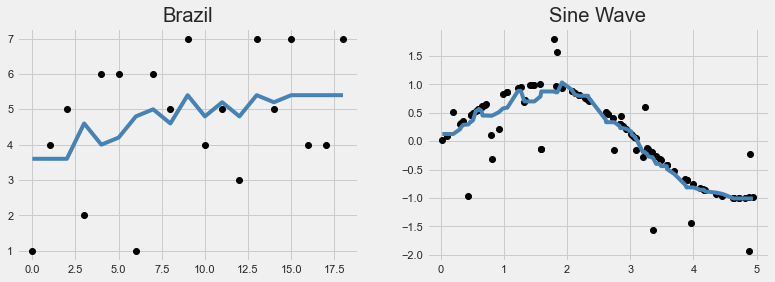

In [48]:
from sklearn.neighbors import KNeighborsRegressor

fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))


clf = KNeighborsRegressor(n_neighbors=5, weights='uniform')
clf.fit(X, y)
y_pred = clf.predict(X)
pd.Series(y_pred).plot(ax=axarr[0], color='steelblue')
pd.Series(y).plot(ax=axarr[0], marker="o", linewidth=0, color='black')

# clf = KNeighborsRegressor(n_neighbors=5, weights='distance')
# clf.fit(X, y)
# y_pred = clf.predict(X)
# pd.Series(y_pred).plot(ax=axarr[0], color='red')
# pd.Series(y).plot(ax=axarr[0], marker="o", linewidth=0, color='black')

axarr[0].set_title("Brazil")

axarr[1].plot(X_p[:, 0], y_p, marker='o', color='black', linewidth=0)

clf = KNeighborsRegressor(n_neighbors=10, weights='uniform')
clf.fit(X_p, y_p)
y_pred = clf.predict(X_p)
sort = np.argsort(X_p[:, 0])
axarr[1].plot(X_p[:, 0][sort], y_pred[sort], markeredgewidth=0, color='steelblue')

# clf = KNeighborsRegressor(n_neighbors=5, weights='distance')
# clf.fit(X_p, y_p)
# y_pred = clf.predict(X_p)
# sort = np.argsort(X_p[:, 0])
# axarr[1].plot(X_p[:, 0][sort], y_pred[sort], markeredgewidth=0, color='steelblue')
axarr[1].set_title("Sine Wave")
pass
plt.show()

Jest to domyślna implementacja, w której każdy sąsiad ma taką samą wagę. 

Istnieje również wersja, która jest ważona na podstawie odległości (weights='distance') i osobny klasyfikator najwyższego poziomu, RadiusNeighborsRegressor, do wyboru punktu na podstawie promienia.

## Regresja wektorów wsparcia

Regresja wektora nośnego jest rozszerzeniem algorytmu wektora nośnego (SVM) do przypadku regresji. Dzielimy przestrzeń, konstruując rozdzielające hiperpłaszczyzny, które maksymalizują odległość między skupiskami punktów w jakiejś złożonej przestrzeni zbudowanej za pomocą jądra.

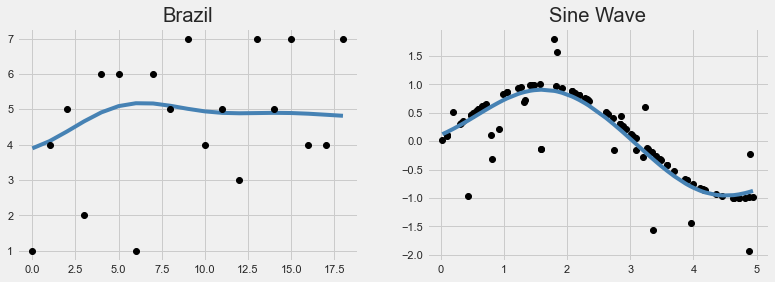

In [49]:
from sklearn.svm import SVR

fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))


clf = SVR()
clf.fit(X, y)
y_pred = clf.predict(X)
pd.Series(y_pred).plot(ax=axarr[0], color='steelblue')
pd.Series(y).plot(ax=axarr[0], marker="o", linewidth=0, color='black')

axarr[0].set_title("Brazil")

axarr[1].plot(X_p[:, 0], y_p, marker='o', color='black', linewidth=0)

clf = SVR()
clf.fit(X_p, y_p)
y_pred = clf.predict(X_p)
sort = np.argsort(X_p[:, 0])
axarr[1].plot(X_p[:, 0][sort], y_pred[sort], markeredgewidth=0, color='steelblue')

axarr[1].set_title("Sine Wave")
pass
plt.show()


Liniowy regresor wektora nośnego wykonuje godną podziwu pracę, dopasowując nasze dane fali sinusoidalnej.

## Stochastyczna regresja gradientu

SGDRegressor jest rozszerzeniem klasyfikacji stochastycznego spadku gradientu na przypadek regresji. 

Stochastyczne zejście gradientowe jest mniej algorytmem uczenia maszynowego niż podejściem do implementacji techniki uczenia maszynowego, a zatem ten klasyfikator może być użyty do ponownego zaimplementowania (choć z lepszą skalowalnością i próbkowaniem), do ponownego zaimplementowania regresji liniowej. 

Podobnie jak w przypadku regresji wektora nośnego, nie jestem pewien, jak działają rozszerzenia; coś do zbadania później.

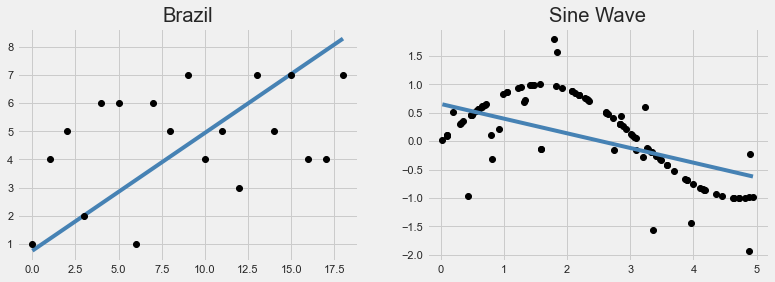

In [51]:
from sklearn.linear_model import SGDRegressor

fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))


clf = SGDRegressor()
clf.fit(X, y)
y_pred = clf.predict(X)
pd.Series(y_pred).plot(ax=axarr[0], color='steelblue')
pd.Series(y).plot(ax=axarr[0], marker="o", linewidth=0, color='black')

axarr[0].set_title("Brazil")

axarr[1].plot(X_p[:, 0], y_p, marker='o', color='black', linewidth=0)

clf = SGDRegressor()
clf.fit(X_p, y_p)
y_pred = clf.predict(X_p)
sort = np.argsort(X_p[:, 0])
axarr[1].plot(X_p[:, 0][sort], y_pred[sort], markeredgewidth=0, color='steelblue')

axarr[1].set_title("Sine Wave")
pass
plt.show()

# Nieparametryczne testy istotności statystycznej

Statystyka nieparametryczna to te metody, które nie zakładają określonego rozkładu danych.

Często odnoszą się do metod statystycznych, które nie zakładają rozkładu Gaussa. Zostały one opracowane do użytku z danymi porządkowymi lub przedziałowymi, ale w praktyce mogą być również używane z rankingiem obserwacji o wartościach rzeczywistych w próbce danych, a nie na samych wartościach obserwacji.

Częstym pytaniem dotyczącym dwóch lub większej liczby zestawów danych jest to, czy są one różne. W szczególności, czy różnica między ich tendencją centralną (np. średnią lub medianą) jest statystycznie istotna.

Na to pytanie można odpowiedzieć w przypadku próbek danych, które nie mają rozkładu Gaussa, stosując nieparametryczne testy istotności statystycznej. Hipotezą zerową tych testów jest często założenie, że obie próbki zostały pobrane z populacji o tym samym rozkładzie, a zatem tych samych parametrach populacji, takich jak średnia lub mediana.

Jeśli po obliczeniu testu istotności na dwóch lub więcej próbach hipoteza zerowa zostanie odrzucona, oznacza to, że istnieją dowody sugerujące, że próbki zostały pobrane z różnych populacji, a z kolei różnica między szacunkowymi próbami parametrów populacji, takimi jak średnie lub mediany może mieć znaczenie.

Ogólnie rzecz biorąc, każdy test oblicza statystykę testową, którą należy interpretować z pewnym doświadczeniem statystycznym i głębszą znajomością samego testu statystycznego. Testy zwracają również wartość p, której można użyć do interpretacji wyniku testu. Wartość p można traktować jako prawdopodobieństwo zaobserwowania dwóch próbek danych przy założeniu podstawowym (hipoteza zerowa), że dwie próbki zostały pobrane z populacji o tym samym rozkładzie.

Jeśli wartość p jest poniżej poziomu istotności, test wskazuje, że istnieją wystarczające dowody, aby odrzucić hipotezę zerową i że próbki prawdopodobnie pochodziły z populacji o różnych rozkładach.

p <= alfa: odrzuć H0, inny rozkład.

p > alfa: brak odrzucenia H0, ta sama dystrybucja.

## Zbiór danych

Zanim przyjrzymy się konkretnym nieparametrycznym testom istotności, najpierw zdefiniujmy testowy zestaw danych, którego możemy użyć do zademonstrowania każdego testu.

Wygenerujemy dwie próbki wylosowane z różnych rozkładów.

Użyjemy funkcji randn() NumPy do wygenerowania próbki 100 liczb losowych Gaussa w każdej próbce ze średnią równą 0 i odchyleniem standardowym 1. Obserwacje w pierwszej próbce są skalowane tak, aby mieć średnią 50 i odchylenie standardowe 5. Obserwacje w drugiej próbie są skalowane do średniej 51 i odchylenia standardowego 5.

Spodziewamy się, że testy statystyczne wykażą, że próbki zostały pobrane z różnych rozkładów, chociaż mały rozmiar próbki wynoszący 100 obserwacji.

In [52]:
# generate gaussian data samples
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate two sets of univariate observations
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51
# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))

data1: mean=50.303 stdv=4.426
data2: mean=51.764 stdv=4.660


## Mann-Whitney U Test

Test U Manna-Whitneya jest nieparametrycznym testem istotności statystycznej służącym do określenia, czy dwie niezależne próbki zostały pobrane z populacji o tym samym rozkładzie.

Test został nazwany na cześć Henry'ego Manna i Donalda Whitneya, chociaż czasami jest nazywany testem Wilcoxona-Manna-Whitneya, również nazwanym na cześć Franka Wilcoxona, który również opracował odmianę testu.

Założeniem domyślnym lub hipotezą zerową jest to, że nie ma różnicy między rozkładami próbek danych. Odrzucenie tej hipotezy sugeruje, że prawdopodobnie istnieje pewna różnica między próbkami. Dokładniej, test określa, czy jest równie prawdopodobne, że jakakolwiek losowo wybrana obserwacja z jednej próbki będzie większa lub mniejsza niż próbka w innym rozkładzie. Jeśli zostanie naruszona, sugeruje różne rozkłady.

Nieudane odrzucenie H0: Rozkłady próbek są równe.

Odrzuć H0: Rozkłady próbek nie są równe.

Aby test był skuteczny, wymaga co najmniej 20 obserwacji w każdej próbce danych.

Możemy zaimplementować test U Manna-Whitneya w Pythonie za pomocą funkcji mannwhitneyu() SciPy. Funkcje pobierają jako argumenty dwie próbki danych. Zwraca statystykę testową i wartość p.

Poniższy przykład ilustruje test U Manna-Whitneya na testowym zbiorze danych.

In [53]:
# Mann-Whitney U test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
# seed the random number generator
seed(1)
# generate two independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51
# compare samples
stat, p = mannwhitneyu(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=4025.000, p=0.009
Different distribution (reject H0)


Uruchomienie przykładu powoduje obliczenie testu na zestawach danych i wydrukowanie statystyki oraz wartości p.

Wartość p silnie sugeruje, że rozkłady próbek są różne, zgodnie z oczekiwaniami.

## Wilcoxon Signed-Rank Test

W niektórych przypadkach próbki danych mogą być sparowane.

Istnieje wiele powodów, dla których może tak być, na przykład próbki są w jakiś sposób powiązane lub dopasowane lub reprezentują dwa pomiary tej samej techniki. Dokładniej, każda próbka jest niezależna, ale pochodzi z tej samej populacji.

Domyślnym założeniem testu, hipotezą zerową, jest to, że dwie próbki mają ten sam rozkład.

Nieudane odrzucenie H0: Rozkłady próbek są równe.

Odrzuć H0: Rozkłady próbek nie są równe.

Aby test był skuteczny, wymaga co najmniej 20 obserwacji w każdej próbce danych.

Test rang ze znakiem Wilcoxona można zaimplementować w Pythonie za pomocą funkcji wilcoxon() SciPy. Funkcja pobiera dwie próbki jako argumenty i zwraca obliczoną statystykę oraz wartość p.

Pełny przykład znajduje się poniżej, demonstrując obliczenie testu rangowanych znaków Wilcoxona dla problemu testowego. Te dwie próbki nie są technicznie sparowane, ale możemy udawać, że są w celu zademonstrowania obliczeń tego testu istotności.

In [54]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import wilcoxon
# seed the random number generator
seed(1)
# generate two independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51
# compare samples
stat, p = wilcoxon(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=1886.000, p=0.028
Different distribution (reject H0)


Uruchomienie przykładu oblicza i drukuje statystykę oraz drukuje wynik.

Wartość p sugeruje, że próbki są pobierane z różnych rozkładów.

## Kruskal-Wallis H Test

Podczas pracy z testami istotności, takimi jak testy U Manna-Whitneya i testy rangowanych znaków Wilcoxona, porównania między próbkami danych należy przeprowadzać parami.

Test Kruskala-Wallisa jest nieparametryczną wersją jednokierunkowej analizy testu wariancji lub w skrócie ANOVA. Jej nazwa pochodzi od twórców metody, Williama Kruskala i Wilsona Wallisa. Ten test można wykorzystać do określenia, czy więcej niż dwie niezależne próbki mają różne rozmieszczenie. Można to traktować jako uogólnienie testu U Manna-Whitneya.

Założeniem domyślnym lub hipotezą zerową jest to, że wszystkie próbki danych zostały pobrane z tego samego rozkładu. W szczególności, że mediany populacji wszystkich grup są równe. Odrzucenie hipotezy zerowej wskazuje, że istnieją wystarczające dowody sugerujące, że jedna lub więcej próbek dominuje nad inną próbką, ale test nie wskazuje, które próbki ani w jakim stopniu.

Nieudane odrzucenie H0: Wszystkie rozkłady próbek są równe.

Odrzuć H0: Co najmniej jeden rozkład próbek nie jest równy.

Każda próbka danych musi być niezależna, mieć 5 lub więcej obserwacji, a próbki danych mogą różnić się wielkością.

Możemy zaktualizować problem testowy tak, aby zawierał 3 próbki danych zamiast 2, z których dwie mają taką samą średnią próbki. Biorąc pod uwagę, że jedna próbka różni się, spodziewalibyśmy się, że test wykryje różnicę i odrzuci hipotezę zerową.

In [55]:
# generate three independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 50
data3 = 5 * randn(100) + 52

Test H Kruskala-Wallisa można zaimplementować w Pythonie za pomocą funkcji kruskal() SciPy. Jako argumenty pobiera dwie lub więcej próbek danych i jako wynik zwraca statystykę testową i wartość p.

In [56]:
# Kruskal-Wallis H-test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import kruskal
# seed the random number generator
seed(1)
# generate three independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 50
data3 = 5 * randn(100) + 52
# compare samples
stat, p = kruskal(data1, data2, data3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=6.051, p=0.049
Different distributions (reject H0)


Uruchomienie przykładu powoduje obliczenie testu i wydrukowanie wyników.

Wartość p jest interpretowana, poprawnie odrzucając hipotezę zerową, że wszystkie próbki mają ten sam rozkład.

## Friedman Test

Jeżeli próbki są w jakiś sposób sparowane, na przykład powtarzane pomiary, wówczas test Kruskala-Wallisa H nie byłby odpowiedni. Zamiast tego można zastosować test Friedmana, nazwany na cześć Miltona Friedmana.

Test Friedmana jest nieparametryczną wersją analizy powtarzanych pomiarów testu wariancji lub testu ANOVA z powtarzanymi pomiarami. Test można traktować jako uogólnienie testu H Kruskala-Wallisa na więcej niż dwie próbki.

Domyślnym założeniem lub hipotezą zerową jest to, że wiele sparowanych próbek ma ten sam rozkład. Odrzucenie hipotezy zerowej wskazuje, że jedna lub więcej sparowanych próbek ma inny rozkład.

Nieudane odrzucenie H0: Rozkłady sparowanych próbek są równe.

Odrzuć H0: sparowane rozkłady próbek nie są równe.

Test zakłada dwie lub więcej sparowanych próbek danych.

Możemy zaimplementować test Friedmana w Pythonie za pomocą funkcji friedmanchisquare() SciPy. Ta funkcja przyjmuje jako argumenty próbki danych do porównania i zwraca obliczoną statystykę oraz wartość p.

Ten test istotności można wykazać na tej samej odmianie zestawu danych testowych, jaka została użyta w poprzedniej sekcji. Mianowicie trzy próbki, dwie o tej samej średniej populacji i jedna o nieco innej średniej. Chociaż próbki nie są sparowane, spodziewamy się, że test wykryje, że nie wszystkie próbki mają ten sam rozkład.

In [57]:
# Friedman test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import friedmanchisquare
# seed the random number generator
seed(1)
# generate three independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 50
data3 = 5 * randn(100) + 52
# compare samples
stat, p = friedmanchisquare(data1, data2, data3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=9.360, p=0.009
Different distributions (reject H0)


Uruchomienie przykładu oblicza test na trzech próbkach danych i drukuje statystykę testową i wartość p.

Interpretacja wartości p poprawnie wskazuje, że co najmniej jedna próbka ma inny rozkład.

## Podsumowanie 

Nieparametryczne testy statystyczne, których można użyć do określenia, czy próbki danych zostały pobrane z populacji o tym samym lub różnym rozkładzie.

Test U Manna-Whitneya do porównywania niezależnych próbek danych: nieparametryczna wersja testu t-Studenta.
Test rangowanych znaków Wilcoxona do porównywania sparowanych próbek danych: nieparametryczna wersja sparowanego testu t Studenta.
Testy Kruskala-Wallisa H i Friedmana do porównywania więcej niż dwóch próbek danych: nieparametrycznej wersji ANOVA i testów ANOVA z powtarzanymi pomiarami.

# Źródła i metaeriały wykorzystane do wykonania projektu

https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html

https://learn.datacamp.com/courses/statistical-simulation-in-python

https://github.com/goodboychan/goodboychan.github.io/blob/main/_notebooks/2020-06-22-01-Resampling-methods.ipynb

https://machinelearningmastery.com/robust-regression-for-machine-learning-in-python/

https://towardsdatascience.com/resampling-methods-for-inference-analysis-e75fecfefcb2

https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

https://en.wikipedia.org/wiki/Nonparametric_statistics

https://en.wikipedia.org/wiki/Paired_difference_test

https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test

https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test

https://en.wikipedia.org/wiki/Kruskal%E2%80%93Wallis_one-way_analysis_of_variance

https://en.wikipedia.org/wiki/Friedman_test